In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataprep
import dynamics
import networks
import topology
import graph_tool as gt
from graph_tool import *

# Creating an MMN Network 

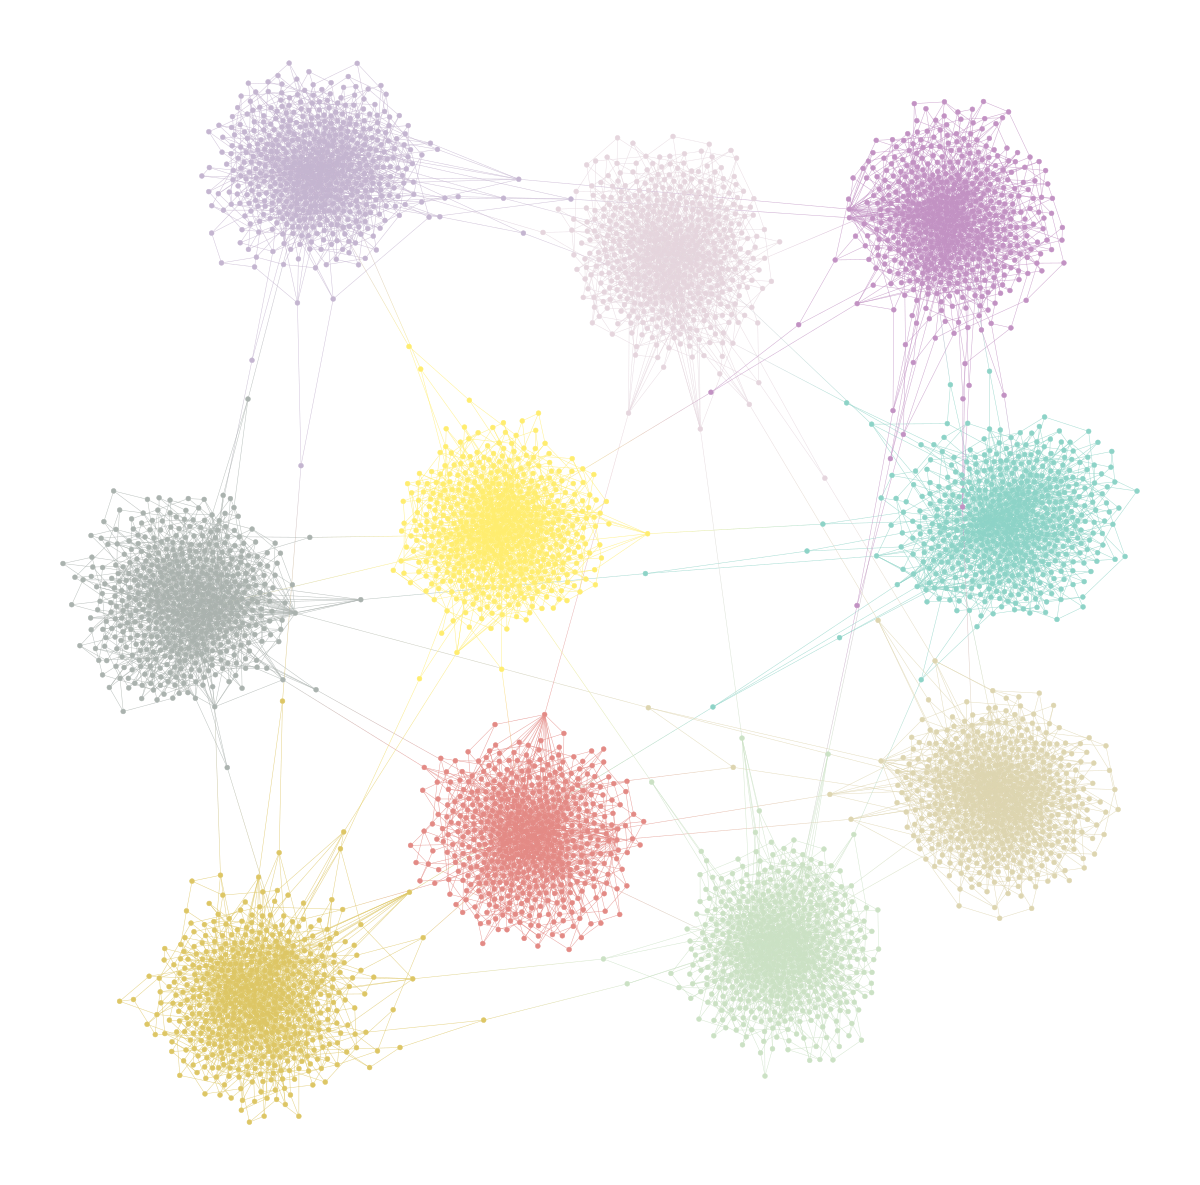

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f240ff766d8, at 0x7f240fef76d8>

In [2]:
# Generating a monodisperse modular network with 10 power-law modules,
# of 500 nodes with kmin=3/kmax=58, exponent of 2.7 and 10 intermodular links
# and no offset.
g_mmn = networks.mmn(10, 500, 3, 58, 2.7, 10, 0)

# Identifying and coloring the modular structure
state = gt.inference.minimize_blockmodel_dl(g_mmn)

state.draw()

# Running the SIS

In [3]:
# Transforming the graph to the neighbor list format and creating
# a starting state corresponding to a fully active network.
neighbor_mmn = dataprep.graph_to_neighbor(g_mmn)
start_mmn = np.arange(1, len(neighbor_mmn)+1, dtype=np.int64)

In [4]:
# Running the SIS on the MMN with a spreading rate below, around, and above the critical point.
# For optimal usage multiprocessing should be utilized, with each core running a simulation.
sis_l007 = [dynamics.sis(0.07, 101, start_mmn, neighbor_mmn, 58, i) for i in range(300)]
sis_l0125 = [dynamics.sis(0.125, 101, start_mmn, neighbor_mmn, 58, i) for i in range(300)]
sis_l02 = [dynamics.sis(0.2, 101, start_mmn, neighbor_mmn, 58, i) for i in range(30)]

In [5]:
# Averaging the several runs
sis_average_l007 = dataprep.density_data_averager(sis_l007)
sis_average_l0125 = dataprep.density_data_averager(sis_l0125)
sis_average_l02 = dataprep.density_data_averager(sis_l02)

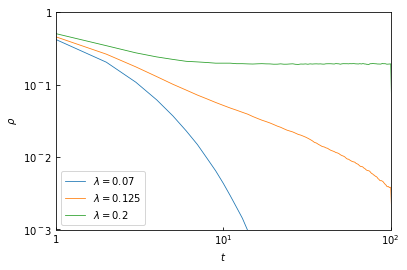

In [6]:
# Visualizing the activity density decay in a log-log plot
fig, ax = plt.subplots()

plt.plot(range(len(sis_average_l007)), sis_average_l007, linewidth=0.8, label=r'$\lambda=0.07$')
plt.plot(range(len(sis_average_l0125)), sis_average_l0125, linewidth=0.8, label=r'$\lambda=0.125$')
plt.plot(range(len(sis_average_l02)), sis_average_l02, linewidth=0.8, label=r'$\lambda=0.2$')
plt.xscale("log")
plt.yscale("log")
plt.xticks([1, 10, 100, 1000], ('$1$', '$10^1$', '$10^2$', '$10^3$'))
plt.yticks([1, 10**-1, 10**-2, 10**-3, 10**-4], ('$1$', '$10^-1$', '$10^-2$', '$10^-3$', '$10^-4$'))
plt.ylim(10**-3, 1)
plt.xlim(10**0, 100)
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.gca().yaxis.set_minor_formatter(plt.NullFormatter())
plt.ylabel(r'$\rho$')
plt.xlabel('$t$')
plt.minorticks_off()
ax.tick_params(direction='in')
plt.legend(markerscale=3, loc='lower left')
plt.show()